In [9]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [10]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip -o cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.657.jpg  
  inflating: cats_and_dogs/train/dogs/dog.131.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.131.jpg  
  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/c

In [11]:
# 3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Crear generadores de imágenes para train, validation y test
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

# Ruta base del dataset
base_dir = './cats_and_dogs'
# Altura y ancho de las imágenes
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
# Generadores de datos
train_data_gen = train_image_generator.flow_from_directory(
    directory=f"{base_dir}/train",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
val_data_gen = validation_image_generator.flow_from_directory(
    directory=f"{base_dir}/validation",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    classes=["."],           # importante: indica que se cargue todo dentro de test_dir
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',     # salida binaria
    shuffle=False            # sin mezcla, para mantener orden
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [12]:

# 4. Crear el modelo CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Salida binaria: gato o perro
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:

# 5. Entrenar el modelo
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Re-creamos el generador de imágenes con aumento de datos
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,           # Rotaciones aleatorias de hasta 40 grados
    width_shift_range=0.2,       # Desplazamiento horizontal
    height_shift_range=0.2,      # Desplazamiento vertical
    shear_range=0.2,             # Transformación de corte
    zoom_range=0.2,              # Zoom aleatorio
    horizontal_flip=True,        # Volteo horizontal
    fill_mode='nearest'          # Cómo rellenar los píxeles vacíos tras transformaciones
)

# Aplicamos el nuevo generador a los datos de entrenamiento
train_data_gen = train_image_generator.flow_from_directory(
    directory=f"{base_dir}/train",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)




Found 2000 images belonging to 2 classes.


Found 2000 images belonging to 2 classes.


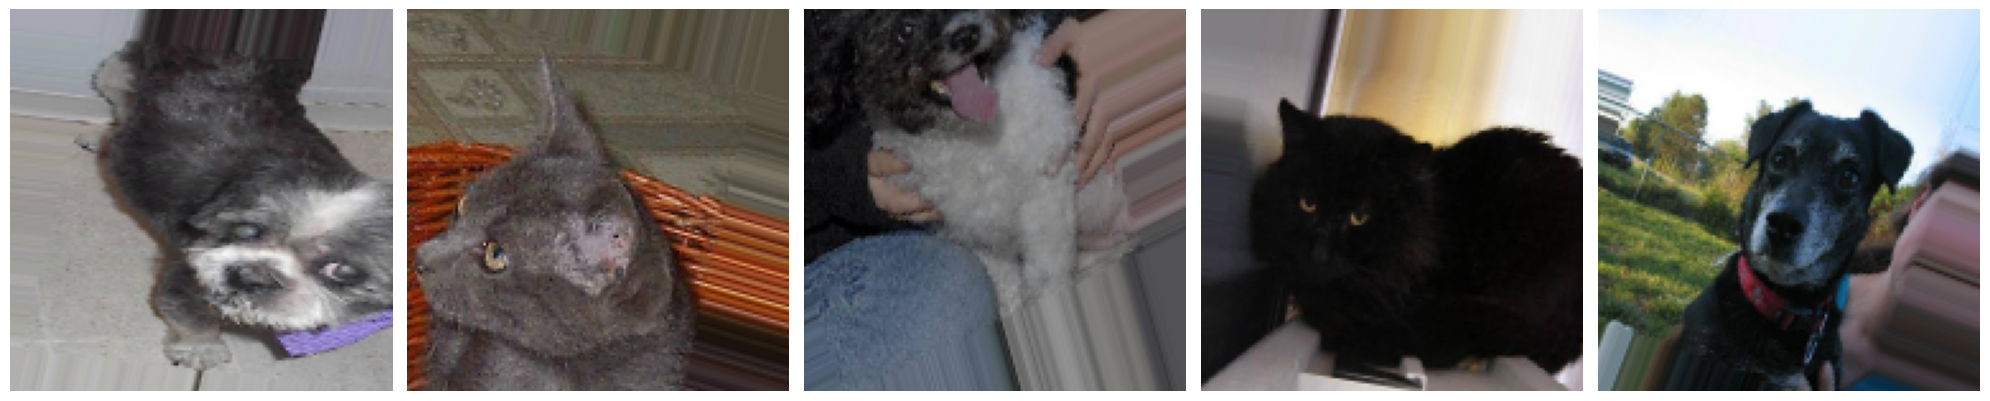

In [17]:

# Celda 6 - Generar datos de entrenamiento y visualizar imágenes aumentadas

# Crear el generador de datos de entrenamiento
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

# Obtener un batch de imágenes del generador (imágenes y etiquetas)
images_batch, labels_batch = next(train_data_gen)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Mostrar las primeras 5 imágenes del batch con la función definida
plotImages(images_batch[:5])


In [18]:

# 7. Crear el modelo CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definimos el modelo secuencial
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binaria: gato o perro
])

# Compilamos el modelo
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:

# 8. Entrenar el modelo con los generadores

EPOCHS = 30  # Puedes subir a 15 o 20 si quieres mejor resultado

history = model.fit(
    train_data_gen,
    steps_per_epoch=2000 // BATCH_SIZE,  # total imágenes entre tamaño del batch
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=1000 // BATCH_SIZE  # igual que arriba, para validación
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 44s 975ms/step - accuracy: 0.4820 - loss: 1.0254

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 283ms/step - accuracy: 0.4917 - loss: 0.8853 - val_accuracy: 0.4990 - val_loss: 0.6872
Epoch 2/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 39s 850ms/step - accuracy: 0.5373 - loss: 0.6856

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 30s 233ms/step - accuracy: 0.5493 - loss: 0.6836 - val_accuracy: 0.5917 - val_loss: 0.6489
Epoch 3/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 39s 852ms/step - accuracy: 0.5221 - loss: 0.6978

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 233ms/step - accuracy: 0.5179 - loss: 0.6941 - val_accuracy: 0.5030 - val_loss: 0.6770
Epoch 4/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 39s 850ms/step - accuracy: 0.5377 - loss: 0.6743

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - accuracy: 0.5464 - loss: 0.6722 - val_accuracy: 0.5192 - val_loss: 0.6834
Epoch 5/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 846ms/step - accuracy: 0.5835 - loss: 0.6672

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 35s 232ms/step - accuracy: 0.5943 - loss: 0.6566 - val_accuracy: 0.6250 - val_loss: 0.6257
Epoch 6/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 837ms/step - accuracy: 0.6273 - loss: 0.6424

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.6282 - loss: 0.6410 - val_accuracy: 0.6351 - val_loss: 0.6215
Epoch 7/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 842ms/step - accuracy: 0.6625 - loss: 0.6212

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 231ms/step - accuracy: 0.6547 - loss: 0.6200 - val_accuracy: 0.6845 - val_loss: 0.5853
Epoch 8/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 39s 849ms/step - accuracy: 0.6870 - loss: 0.5943

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - accuracy: 0.6777 - loss: 0.5966 - val_accuracy: 0.6784 - val_loss: 0.5882
Epoch 9/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 39s 848ms/step - accuracy: 0.6961 - loss: 0.5881

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 233ms/step - accuracy: 0.6875 - loss: 0.5876 - val_accuracy: 0.6794 - val_loss: 0.5748
Epoch 10/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 846ms/step - accuracy: 0.6709 - loss: 0.6021

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.6706 - loss: 0.5954 - val_accuracy: 0.6663 - val_loss: 0.5869
Epoch 11/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 39s 869ms/step - accuracy: 0.6864 - loss: 0.5853

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - accuracy: 0.6828 - loss: 0.5880 - val_accuracy: 0.6421 - val_loss: 0.6072
Epoch 12/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 829ms/step - accuracy: 0.6715 - loss: 0.5897

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - accuracy: 0.6771 - loss: 0.5898 - val_accuracy: 0.7248 - val_loss: 0.5480
Epoch 13/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 829ms/step - accuracy: 0.6685 - loss: 0.5857

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 236ms/step - accuracy: 0.6818 - loss: 0.5786 - val_accuracy: 0.7258 - val_loss: 0.5508
Epoch 14/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 834ms/step - accuracy: 0.6887 - loss: 0.5686

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.7004 - loss: 0.5666 - val_accuracy: 0.7238 - val_loss: 0.5459
Epoch 15/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 37s 823ms/step - accuracy: 0.7323 - loss: 0.5445

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - accuracy: 0.7336 - loss: 0.5431 - val_accuracy: 0.7157 - val_loss: 0.5414
Epoch 16/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 37s 823ms/step - accuracy: 0.7276 - loss: 0.5485

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 225ms/step - accuracy: 0.7235 - loss: 0.5527 - val_accuracy: 0.7218 - val_loss: 0.5425
Epoch 17/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 837ms/step - accuracy: 0.7383 - loss: 0.5337

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.7266 - loss: 0.5415 - val_accuracy: 0.7419 - val_loss: 0.5264
Epoch 18/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 37s 805ms/step - accuracy: 0.7488 - loss: 0.5329

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - accuracy: 0.7460 - loss: 0.5262 - val_accuracy: 0.7177 - val_loss: 0.5495
Epoch 19/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 839ms/step - accuracy: 0.7397 - loss: 0.5262

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 230ms/step - accuracy: 0.7414 - loss: 0.5206 - val_accuracy: 0.7319 - val_loss: 0.5217
Epoch 20/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 837ms/step - accuracy: 0.7494 - loss: 0.5213

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - accuracy: 0.7480 - loss: 0.5165 - val_accuracy: 0.7510 - val_loss: 0.5062
Epoch 21/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 830ms/step - accuracy: 0.7491 - loss: 0.5100

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - accuracy: 0.7501 - loss: 0.5118 - val_accuracy: 0.7399 - val_loss: 0.4959
Epoch 22/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 37s 816ms/step - accuracy: 0.7329 - loss: 0.5276

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.7311 - loss: 0.5252 - val_accuracy: 0.7288 - val_loss: 0.5177
Epoch 23/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 37s 824ms/step - accuracy: 0.7420 - loss: 0.5079

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.7442 - loss: 0.5090 - val_accuracy: 0.7349 - val_loss: 0.5107
Epoch 24/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 845ms/step - accuracy: 0.7549 - loss: 0.4884

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 231ms/step - accuracy: 0.7587 - loss: 0.4910 - val_accuracy: 0.7359 - val_loss: 0.5208
Epoch 25/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 39s 869ms/step - accuracy: 0.7566 - loss: 0.4988

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 314ms/step - accuracy: 0.7495 - loss: 0.5050 - val_accuracy: 0.7359 - val_loss: 0.5226
Epoch 26/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 831ms/step - accuracy: 0.7492 - loss: 0.5155

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - accuracy: 0.7450 - loss: 0.5183 - val_accuracy: 0.7500 - val_loss: 0.5071
Epoch 27/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 840ms/step - accuracy: 0.7511 - loss: 0.4965

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.7566 - loss: 0.4955 - val_accuracy: 0.7399 - val_loss: 0.5185
Epoch 28/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 832ms/step - accuracy: 0.7818 - loss: 0.4766

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 227ms/step - accuracy: 0.7727 - loss: 0.4731 - val_accuracy: 0.7540 - val_loss: 0.4920
Epoch 29/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 833ms/step - accuracy: 0.7699 - loss: 0.4889

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 228ms/step - accuracy: 0.7659 - loss: 0.4925 - val_accuracy: 0.7530 - val_loss: 0.4962
Epoch 30/30
16/62 ━━━━━━━━━━━━━━━━━━━━ 38s 834ms/step - accuracy: 0.7550 - loss: 0.4949

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - accuracy: 0.7535 - loss: 0.5060 - val_accuracy: 0.7440 - val_loss: 0.5132


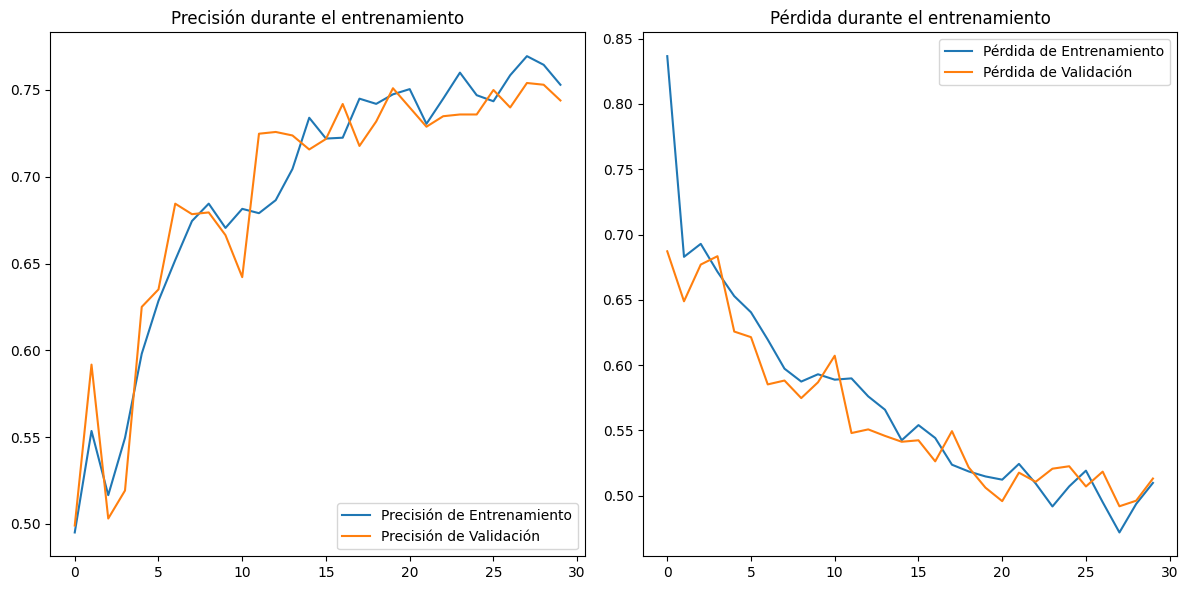

In [20]:

# 9. Visualizar precisión y pérdida del modelo

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión de Entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión de Validación')
plt.legend(loc='lower right')
plt.title('Precisión durante el entrenamiento')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida de Validación')
plt.legend(loc='upper right')
plt.title('Pérdida durante el entrenamiento')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


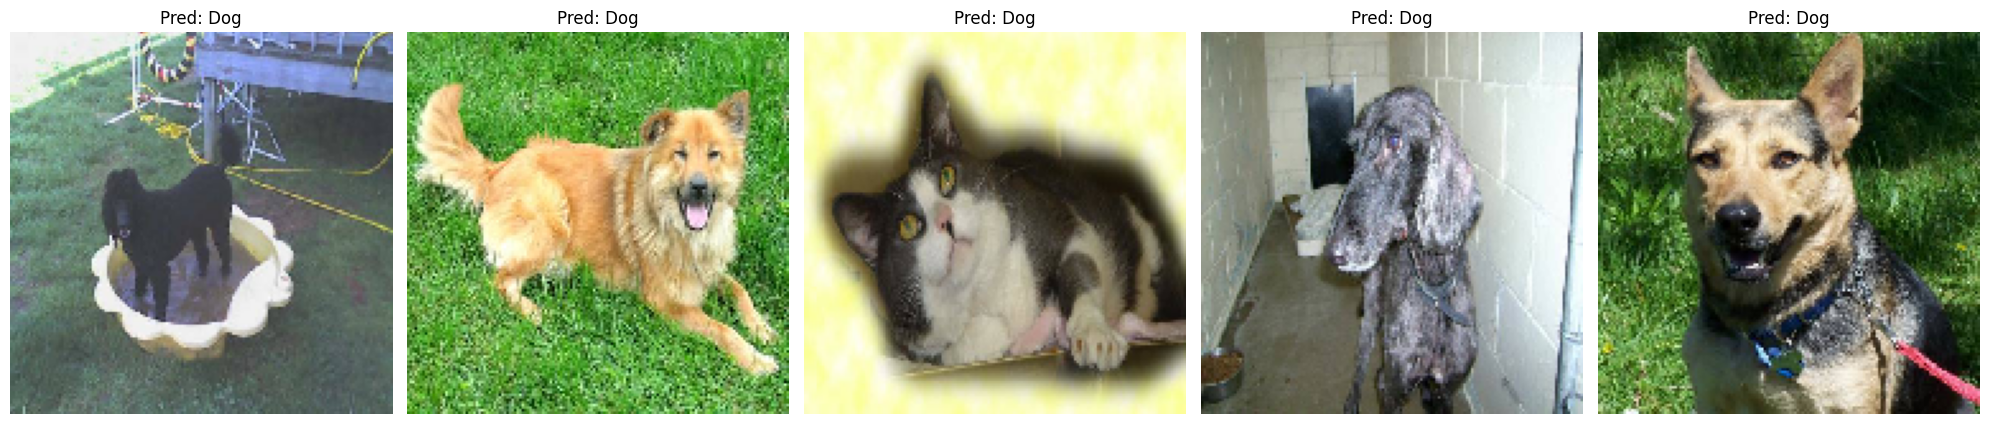

In [23]:

# Celda 10 - Predicción sobre imágenes de test

# Obtener todas las imágenes y etiquetas
test_images, test_labels = next(test_data_gen)

# Obtener probabilidades de predicción
probabilities = model.predict(test_images).flatten()

# Convertir probabilidades a clases binarias (0 = gato, 1 = perro)
predicted_classes = [1 if p > 0.5 else 0 for p in probabilities]

# Función para mostrar imágenes con etiquetas predichas
def plotImagesWithLabels(images_arr, labels_arr):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20, 20))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f'Pred: {"Dog" if label == 1 else "Cat"}')
    plt.tight_layout()
    plt.show()

# Mostrar las primeras 5 imágenes del test con sus predicciones
plotImagesWithLabels(test_images[:5], predicted_classes[:5])



In [24]:
# Celda 11 - Evaluación del modelo con datos de test

# Evaluar el modelo y obtener la pérdida y precisión
loss, accuracy = model.evaluate(test_data_gen)
print(f"Pérdida (loss) en test: {loss:.4f}")
print(f"Precisión (accuracy) en test: {accuracy:.4f}")



1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.3125 - loss: 1.4588

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.3308 - loss: 1.5886
Pérdida (loss) en test: 1.6534
Precisión (accuracy) en test: 0.3400
